# Homework 2: Control Structures

Please complete this homework assignment in code cells in the iPython notebook. Include comments in your code when necessary.  Please rename the notebook as SIS ID_HW02.ipynb (your student ID number) and save the notebook once you have executed it as a PDF  (note, that when saving as PDF you don't want to use the option with latex because it crashes, but rather the one to save it directly as a PDF). 

**The homework should be submitted on bCourses under the Assignments tab (both the .ipynb and .pdf files). Please label it by your student ID number (SIS ID)**

## Problem 1: Binomial Coefficients

[Adapted from Newman, Exercise 2.11] The binomial coefficient $n \choose k$ is an integer equal to

$$ {n \choose k} = \frac{n!}{k!(n-k)!} = \frac{n \times (n-1) \times (n-2) \times \cdots \times (n-k + 1)}{1 \times 2 \times \cdots \times k} $$

when $k \geq 1$, or ${n \choose 0} = 1$ when $k=0$. (The special case $k=0$ can be included in the general definition by using the conventional definition $0! \equiv 1$.)

1. Write a function `factorial(n)` that takes an integer $n$ and returns $n!$ as an integer. It should yield $1$ when $n=0$. You may assume that the argument will also be an integer greater than or equal to 0.

1. Using the form of the binomial coefficient given above, write a function `binomial(n,k)` that calculates the binomial coefficient for given $n$ and $k$. Make sure your function returns the answer in the form of an integer (not a float) and gives the correct value of 1 for the case where $k=0$. (Hint: Use your `factorial` function from Part 1.)

1. Using your `binomial` function, write a function `pascals_triangle(N)` to print out the first $N$ lines of "Pascal's triangle" (starting with the $0$th line). The $n$th line of Pascal's triangle contains $n+1$ numbers, which are the coefficients $n \choose 0$, $n \choose 1$, and so on up to $n \choose n$. Thus the first few lines are
        1
        1 1
        1 2 1
        1 3 3 1
        1 4 6 4 1     
This would be the result of `pascals_triangle(5)`. Print the first 10 rows of Pascal's triangle.
        
1. The probability that an ubiased coin, tossed $n$ times, will come up heads $k$ times is ${n \choose k} / 2^n$. (Or instead of coins, perhaps you'd prefer to think of spins measured in a [Stern-Gerlach experiment](https://en.wikipedia.org/wiki/Stern%E2%80%93Gerlach_experiment).)
    - Write a function `heads_exactly(n,k)` to calculate the probability that a coin tossed $n$ times comes up heads exactly $k$ times.
    - Write a function `heads_atleast(n,k)` to calculate the probability that a coin tossed $n$ times comes up heads $k$ or more times.
    - Print the probabilities (to three digits) that a coin tossed 100 times comes up heads exactly 70 times, and at least 70 times. You should print corresponding statements with the numbers so it is clear what they each mean.

1. Along with the printed statements from Part 4, have your code generate and display two labelled plots for `heads_exactly(n,k)` and `heads_atleast(n,k)` with $n=100$. You should have values of $k$ on the $x$-axis, and probabilities on the $y$-axis. (Note that $k$ only takes integer values from 0 to $n$, inclusive. Your plots can be connected curves or have discrete markers for each point; either is fine.)

#### Output

To summarize, your program should output the following things:

1. The first 10 rows of Pascal's triangle
1. The probabilities (to three digits) that a coin tossed 100 times comes up heads exactly 70 times, and at least 70 times, with corresponding statements so it is clear what each number signifies.
1. Two labeled plots for `heads_exactly(n,k)` and `heads_atleast(n,k)` with $n=100$, representing probability distributions for 100 coin flips.

#### Reminder

Remember to write informative doc strings, comment your code, and use descriptive function and variable names so others (and future you) can understand what you're doing!


In [1]:
'''The numpy library has a lot of useful functions
and we always use matplotlib for plotting, so it's 
generally a good idea to import them at the beginning.'''
import numpy as np
import matplotlib.pyplot as plt

def factorial(n):
    """Returns the factorial of n"""
    return_value = 1
    
    #Try using a for loop to update the return_value and calculate n!
    for i in range(1, n + 1, 1):
        return_value *= i
    
    return return_value

print(factorial(5))
print(factorial(1))

120
1


In [2]:
def binomial(n, k):
    """Returns the binomial coefficient n choose k"""
    
    #Use a conditional statement to return 1 in the case k = 0
    if k == 0:
        return 1
    
    #Use factorial(n) to calculate the binomial coefficient
    return (int)(factorial(n) / factorial(k) / factorial(n - k))

print(binomial(5, 3))
print(binomial(5, 0))

10
1


In [3]:
def pascals_triangle(N):
    """Prints out N rows of pascal's triangle"""
    
    #A "double for loop" has been set up below; 
    #Python goes through the entire inner loop during each pass through the outer loop
    
    for row in range(0, N + 1):       #This is the outer loop; each pass through the loop corresponds to one row of the triangle
        for k in range(0, row + 1):   #This is is the inner loop; each pass through the loop corresponds to a number on the row
            #Code here is part of each inner loop iteration (i.e. print a binomial coefficient)
            print(binomial(row, k), end = " ")
            
        #Code here is part of the outer loop
        print(" ")
        
    #This function doesn't need to return anything
pascals_triangle(10)

1  
1 1  
1 2 1  
1 3 3 1  
1 4 6 4 1  
1 5 10 10 5 1  
1 6 15 20 15 6 1  
1 7 21 35 35 21 7 1  
1 8 28 56 70 56 28 8 1  
1 9 36 84 126 126 84 36 9 1  
1 10 45 120 210 252 210 120 45 10 1  


In [39]:
def heads_exactly(n,k):
    """Returns the probability of getting k heads if you flip a coin n times"""
    probability = binomial(n, k) / 2 ** n
    return probability #Use binomial(n,k) to calculate the probability

print("The probability that a coin tossed 100 times comes up heads exactly 70 times: {:.3f}".format(heads_exactly(100, 70)))

The probability that a coin tossed 100 times comes up heads exactly 70 times: 0.000


In [38]:
def heads_atleast(n,k):
    """Returns the probability of getting at least k heads if you flip a coin n times"""
    total_prob = 0
    
    #Use a for loop and heads_exactly(n,k) to update total_prob
    for i in range(k, n+1):
        total_prob += heads_exactly(n, i)
    
    return total_prob

print("The probability that a coin tossed 100 times comes up heads 70 or more times: {:.3f}".format(heads_atleast(100, 70)))

The probability that a coin tossed 100 times comes up heads 70 or more times: 0.000


Text(0.5, 1.0, 'heads_atleast(100, k)')

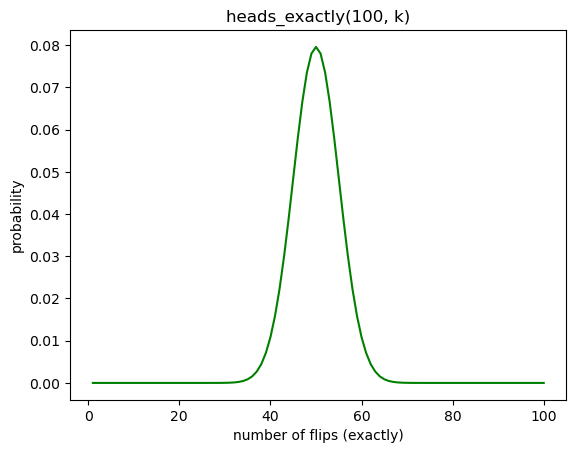

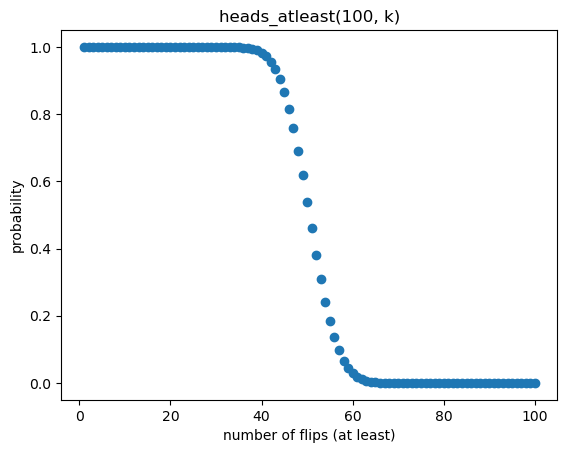

In [57]:
#Now use your defined functions to produce the desired outputs
#For the plots, the np.arange() function is useful for creating a numpy array of integers

k_values = np.arange(1,101)  #integers from 1 to 100 (lower bound is inclusive; upper bound is exclusive)
plt.figure(1) #빈 figure 생성
s1 = [heads_exactly(100, k) for k in k_values]
plt.plot(k_values, s1, '-g')
plt.xlabel('number of flips (exactly)')
plt.ylabel('probability')
plt.title('heads_exactly(100, k)')

plt.figure(2)
s2 = [heads_atleast(100, k) for k in k_values]
plt.scatter(k_values, s2)
plt.xlim()
plt.xlabel('number of flips (at least)')
plt.ylabel('probability')
plt.title('heads_atleast(100, k)')

## Problem 2: Semi-Empirical Mass Formula

[Adapted from Newman, Exercise 2.10] In nuclear physics, the semi-empirical mass formula is a formula for calculating the approximte nuclear binding energy $B$ of an atomic nucleus with atomic number $Z$ and mass number $A$:

$$ B = a_V A - a_S A^{2/3} - a_C \frac{Z^2}{A^{1/3}} - a_A \frac{(A-2Z)^2}{A} + \delta\frac{a_P}{A^{1/2}}, $$

where, in units of millions of electron volts (MeV), the constants are $a_V = 14.64$, $a_S = 14.08$, $a_C = 0.64$, $a_A = 21.07$, $a_P=11.54$, and

$$ \delta = \begin{cases}
0 & \text{if } A \text{ is odd,}\\
+1 & \text{if } A \text{ and } Z \text{ are both even,} \\
-1 & \text{if } A \text{ is even and } Z \text{ is odd.}
\end{cases} $$
The values above are taken from D. Benzaid <i>et al.</i>, NUCL SCI TECH <b>31</b>, 9 (2020); https://doi.org/10.1007/s41365-019-0718-8


1. Write a function `binding_energy(A, Z)` that takes as its input the values of $A$ and $Z$, and returns the binding energy for the corresponding atom. Check your function by computing the binding energy of an atom with $A = 58$ and $Z = 28$. (Hint: The correct answer is around 490 MeV, and this formula should reproduce it to about 10%.)

1. Write a function `binding_energy_per_nucleon(A, Z)` which returns not the total binding energy $B$, but the binding energy per nucleon, which is $B/A$.

1. Write a function `max_binding_energy_per_nucleon(Z)` which takes as input just a single value of the atomic number $Z$ and then goes through all values of $A$ from $A = Z$ to $A = 3Z$, to find the one that has the largest binding energy per nucleon. This is the most stable nucleus with the given atomic number. Have your function return the value of $A$ for this most stable nucleus and the value of the binding energy per nucleon.

1. Finally, use the functions you've written to write a program which runs through all values of $Z$ from 1 to 100 and prints out the most stable value of $A$ for each one. At what value of $Z$ does the maxium binding energy per nucleon occur? (The true answer, in real life, is $Z = 28$, which is nickel. You should find that the semi-empirical mass formula gets the answer roughly right, but not exactly.)

#### Output

Your final output should look like

    Z =   1 : most stable A is 2
    Z =   2 : most stable A is 4
          .
          .
          .
    Z =  10 : most stable A is 20
    Z =  11 : most stable A is 23
          .
          .
          .
    Z = 100 : most stable A is 210
    The most stable Z is ____
    with binding energy per nucleon ____

With the ...'s and ____'s replaced with your results. The binding energy per nucleon in the last line should have three decimal places.

For maximum readability, you should include the extra whitespace around the $Z =$ numbers so everything lines up, as shown. (To remember the `print` formatting syntax to do this, see Table 1.1 in the Ayars text.)

#### Reminder

Remember to write informative doc strings, comment your code, and use descriptive function and variable names so others (and future you) can understand what you're doing!


In [12]:
import numpy as np

def binding_energy(A, Z):
    """Returns the nuclear binding energy in MeV of an atomic nucleus with atomic number Z and mass number A"""
    aV = 14.64 
    aS = 14.08
    aC = 0.64
    aA = 21.07
    aP = 11.54

    #Use conditional statements (if, elif, else) to declare the variable delta with the appropriate value
    if A % 2 != 0: #odd
        delta = 0
    elif A % 2 == 0 and Z % 2 == 0: #A and Z are both even
        delta = 1
    elif A % 2 == 0 and Z % 2 != 0: #A is even and Z is odd
        delta = -1
        
    B = aV*A - aS*(A**(2/3)) - aC*((Z**2)/A**(1/3)) - aA*((A - 2*Z)**2/A) + delta*aP/A**(1/2)
    
    return B #Use the above formula for B, the binding energy

#Now check your function by calculating the requested binding energy
binding_energy(58, 28)

508.58749039317803

In [8]:
def binding_energy_per_nucleon(A, Z):
    """Returns the nuclear binding energy per nucleon in MeV of an atomic nucleus with atomic number Z and mass number A"""
    return binding_energy(A, Z) / A #Use binding_energy(A, Z) and the number of nucleons

In [9]:
def max_binding_energy_per_nucleon(Z):
    """For atomic nucleus with atomic number Z, returns that mass number A that yields that maximum binding energy
       per nucleon, as well as that resultant maximum binding energy per nucleon in MeV"""
    
    #We can make our default return value A = Z and the corresponding binding energy
    max_A = Z
    max_binding_energy_per_nucleon = binding_energy_per_nucleon(Z, Z)
    
    #Use a for loop to go from A = Z to A = 3*Z, and update the return variables if a new maximum is found
    #A conditional statement within the loop is useful for comparing max_binding_energy_per_nucleon to a potential new maximum
    for i in range(Z, 3*Z + 1, 1):
        if binding_energy_per_nucleon(i, Z) > max_binding_energy_per_nucleon:
            max_binding_energy_per_nucleon = binding_energy_per_nucleon(i, Z)
            max_A = i
        #print(i, max_A, max_binding_energy_per_nucleon)
    return max_A, max_binding_energy_per_nucleon

In [17]:
#Now use a for loop and the function max_binding_energy_per_nucleon(Z) to print the final output
max_A = 0
max_Z = 0
max_binding_energy_per_nucleon_value = 0

for Z in range(1, 101, 1):
    A, binding_energy_per_nucleon_value = max_binding_energy_per_nucleon(Z)
        
    if binding_energy_per_nucleon_value > max_binding_energy_per_nucleon_value:
        max_binding_energy_per_nucleon_value = binding_energy_per_nucleon_value
        max_A = A
        max_Z = Z
        
    print("Z = {:>3d} : most stable A is {:>3d}".format(Z, A))
    
print("The most stable Z is {:d}".format(max_Z))
print("with binding energy per nucleon {:.3f}".format(max_binding_energy_per_nucleon_value))

Z =   1 : most stable A is   3
Z =   2 : most stable A is   4
Z =   3 : most stable A is   7
Z =   4 : most stable A is   8
Z =   5 : most stable A is  11
Z =   6 : most stable A is  12
Z =   7 : most stable A is  15
Z =   8 : most stable A is  18
Z =   9 : most stable A is  19
Z =  10 : most stable A is  22
Z =  11 : most stable A is  23
Z =  12 : most stable A is  26
Z =  13 : most stable A is  29
Z =  14 : most stable A is  30
Z =  15 : most stable A is  33
Z =  16 : most stable A is  34
Z =  17 : most stable A is  37
Z =  18 : most stable A is  40
Z =  19 : most stable A is  41
Z =  20 : most stable A is  44
Z =  21 : most stable A is  47
Z =  22 : most stable A is  48
Z =  23 : most stable A is  51
Z =  24 : most stable A is  54
Z =  25 : most stable A is  55
Z =  26 : most stable A is  58
Z =  27 : most stable A is  61
Z =  28 : most stable A is  62
Z =  29 : most stable A is  65
Z =  30 : most stable A is  68
Z =  31 : most stable A is  69
Z =  32 : most stable A is  72
Z =  33 

## Problem 3: Particle in a Box

[Adapted from Ayars, Problem 3-1] The energy levels for a quantum particle in a three-dimensional rectangular box of dimensions $\{L_1, L_2, \text{ and } L_3\}$ are given by

$$ E_{n_1, n_2, n_3} = \frac{\hbar^2 \pi^2}{2m} \left[ \frac{n_1^2}{L_1^2} + \frac{n_2^2}{L_2^2} + \frac{n_3^2}{L_3^2} \right] $$

where the $n$'s are integers greater than or equal to one. Your goal is to write a program that will calculate, and list in order of increasing energy, the values of the $n$'s for the 10 lowest *different* energy levels, given a box for which $L_2 = 2L_1$ and $L_3 = 4L_1$.

Your program should include two user-defined functions that you may find helpful in accomplishing your goal:

1. A function `energy(n1, n2, n3)` that takes integer values $n_1$, $n_2$, and $n_3$, and computes the corresponding energy level in units of $\hbar^2 \pi^2/2 m L_1^2$.

1. A function `lowest_unique_K(K, List)` which takes a positive integer $K$ and a list of real numbers `List`, and returns an ordered (ascending) list of the lowest $K$ unique numbers in the list `List`. For instance, `lowest_unique_K(3, [-0.5, 3, 3, 2, 6, 7, 7])` would return `[-0.5, 2, 3]`. The function should not modify the original list `List`.
    - As with most programming puzzles, there are several ways to write this function. Depending on how you do it, you may or may not find it helpful to Google how to "sort" lists, or how to "del" or "pop" items out of lists.
    
You may also wish to make other user-defined functions depending on how you go about solving the problem. In fact, if you find some clever way to solve the problem that doesn't use `lowest_unique_K`, that is fine too! (You still need to write `lowest_unique_K`, though.) But whatever you do, be sure to comment your code clearly!

#### Output

Your final output should look like this (though with different numbers, and not necessarily the same number of lines):

    energy, n1, n2, n3
    (0.4375, 1, 1, 1)
    (0.625, 1, 2, 1)
    (0.8125, 2, 1, 1)
    (0.9375, 1, 3, 1)
    (1.0, 2, 2, 1)
    (1.1875, 1, 1, 2)
    (1.3125, 2, 3, 1)
    (1.375, 1, 2, 2)
    (1.375, 1, 4, 1)
    (1.4375, 3, 1, 1)
    (1.5625, 2, 1, 2)

Notice how there are only 10 unique energies listed, but more than 10 lines. Each line could also have brackets instead of parentheses if you prefer, like this: `[0.4375, 1, 1, 1]`.

#### Reminder

Remember to write informative doc strings, comment your code, and use descriptive function and variable names so others (and future you) can understand what you're doing!

#### Just for fun

If you'd like, write a function `print_table(list_of_lists)` that takes  a list of lists (or a list of tuples) and prints them in a nicely aligned table. Feel free to Google to get ideas on how to do this. Try to get your function to produce something like

    energy  n1 n2 n3
    0.4375  1  1  1
    0.625   1  2  1
    0.8125  2  1  1
    0.9375  1  3  1
    1.0     2  2  1
    1.1875  1  1  2
    1.3125  2  3  1
    1.375   1  2  2
    1.375   1  4  1
    1.4375  3  1  1
    1.5625  2  1  2

In [23]:
def energy(n1, n2, n3):
    """Returns the n-dependent coefficient of the particle-in-a-3D-box energy level for quantum numbers n1, n2, and n3.
    The box's lengths along dimensions 1, 2, and 3 go as L, 2*L, 4*L"""
    #h = 6.62607015 * 10**(-34)
    E = (16*n1**2 + 4*n2**2 + n3**2) / 16
    
    return E #Use the formula given above
energy(1, 1, 1)

1.3125

In [24]:
import copy

def lowest_unique_K(K, List):
    """Takes a positive integer K and a list of real numbers List, and returns an ordered (ascending) list of the lowest K unique numbers in the list List"""
    lowest_unique_K_list = [0] * K  #This is a list of zeros (K of them)
    #Or you may want to start with lowest_unique_K_list = [], an empty list
    
    copied_list = copy.copy(List)  #This gives us a copy of List; any changes you make to copied_list will not affect List
    copied_list.sort(reverse=False)
    #There's a lot of different ways to approach writing this function
    #Try breaking it up into smaller steps and figure out what you'd like to do before writing any code
    #If you have trouble turning logical steps into actual code, feel free to ask for help
    lowest_unique_K_list = copied_list[:K]
    
    return lowest_unique_K_list

lowest_unique_K(3, [-0.5, 3, 3, 2, 6, 7, 7])

[-0.5, 2, 3]

In [47]:
#Now create a list of energies for different values of n1, n2, n3 (taking each from 1 to 10 should be sufficient)
#Remember to keep track of the corresponding n1, n2, n3 values for each energy, since we need to print them
#Then use lowest_unique_K(10, List) on this list of energies to find the first 10
#Finally, print these 10 energies and their corresponding n1, n2, n3 values
#You may find a dictionary helpful for keeping track of the association between energy values and n values
list = []

for n1 in range(1, 11):
    for n2 in range(1, 11):
        for n3 in range(1, 11):
            list.append([energy(n1, n2, n3), n1, n2, n3])

            lowest_list = lowest_unique_K(10, list)
#print(lowest)

print('{} {} {} {}'.format('energy', 'n1', 'n2', 'n3'))

for i in range(len(lowest_list)):
    print(tuple(lowest_list[i]))

energy n1 n2 n3
(1.3125, 1, 1, 1)
(1.5, 1, 1, 2)
(1.8125, 1, 1, 3)
(2.0625, 1, 2, 1)
(2.25, 1, 1, 4)
(2.25, 1, 2, 2)
(2.5625, 1, 2, 3)
(2.8125, 1, 1, 5)
(3.0, 1, 2, 4)
(3.3125, 1, 3, 1)


In [58]:
def print_table(list):
    print('{} {} {} {}'.format('energy', 'n1', 'n2', 'n3'))
    for i in range(len(list)):
        print('{:.3f} {:2d} {:2d} {:2d}'.format(list[i][0], list[i][1], list[i][2], list[i][3]))
    
print_table(lowest_list)

energy n1 n2 n3
1.312  1  1  1
1.500  1  1  2
1.812  1  1  3
2.062  1  2  1
2.250  1  1  4
2.250  1  2  2
2.562  1  2  3
2.812  1  1  5
3.000  1  2  4
3.312  1  3  1
